In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
cd drive/MyDrive/Data/

[Errno 2] No such file or directory: 'drive/MyDrive/Data/'
/content/drive/MyDrive/Data


In [ ]:
!pip install scikit-plot


In [ ]:
import pandas as pd
import numpy as np
from sklearn import tree,svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
import seaborn as sns
import graphviz
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_curve,auc,recall_score,precision_score
from sklearn.ensemble import RandomForestClassifier
import scikitplot as skplt
%matplotlib inline

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
df=pd.read_csv('city hotel & resort hotel.csv.csv')

In [ ]:
print(df.head())

             Timestamp What do you like to prefer more?  \
0  20/02/2021 13:13:48                     Resort hotel   
1  20/02/2021 13:16:53                     Resort hotel   
2  20/02/2021 13:46:01                     Resort hotel   
3  20/02/2021 13:46:08                     Resort hotel   
4  20/02/2021 13:57:17                       City hotel   

           Why do you like to hangout in this hotel?  \
0                                   Good Environment   
1  Facility, Good Environment, Affordable, Food a...   
2                         Facility, Good Environment   
3                         Facility, Good Environment   
4                                   Good Environment   

  Which kind of facilities are given in COVID-19 situation?  \
0                                       Sanitization          
1           Sanitization, Temperature Checking, Mask          
2           Sanitization, Temperature Checking, Mask          
3           Sanitization, Temperature Checking, Mask    

In [ ]:
df.head()

,Timestamp,What do you like to prefer more?,Why do you like to hangout in this hotel?,Which kind of facilities are given in COVID-19 situation?,Are you satisfied with the above facilities?,What was the reason for your visit?,Were you alone or in a group?,Why did you choose this hotel?,Were the staff friendly and helpful?,Did you eat at the hotel?,How would you rate the hotel?,Food Hygiene rating.,How Likely are you to stay at this hotel again?,"Overall were you satisfied ,dissatisfied , or neither?",Would you like to suggest them to improve their service?,How Likely are you to recommend this hotel?
0,20/02/2021 13:13:48,Resort hotel,Good Environment,Sanitization,Yes,Budget friendly,Group,Good Facility,Yes,Yes,Excellent,Excellent,Yes,Satisfied,No,Very Nice
1,20/02/2021 13:16:53,Resort hotel,"Facility, Good Environment, Affordable, Food a...","Sanitization, Temperature Checking, Mask",Yes,For the trip,Group,Good Facility,Yes,Yes,Good,Generally Satisfactory,May be,Satisfied,Yes,good
2,20/02/2021 13:46:01,Resort hotel,"Facility, Good Environment","Sanitization, Temperature Checking, Mask",Yes,For the trip,Group,Good Facility,Yes,Yes,Excellent,Very Good,May be,Satisfied,No,Very good
3,20/02/2021 13:46:08,Resort hotel,"Facility, Good Environment","Sanitization, Temperature Checking, Mask",Yes,For the trip,Group,Good Facility,Yes,Yes,Excellent,Very Good,May be,Satisfied,No,Very good
4,20/02/2021 13:57:17,City hotel,Good Environment,"Sanitization, Temperature Checking",No,For the trip,Group,"Good Facility, Acessibility, Dinning Option, S...",Yes,Yes,Good,Generally Satisfactory,May be,Satisfied,Yes,Yes I will recommend this hotel


In [ ]:
df.rename(columns={'What do you like to prefer more?':'Hotel Type',
                   'Why do you like to hangout in this hotel?':'Hangout',
                  'Which kind of facilities are given in COVID-19 situation?':'COVID-19 Situation',
                  'Are you satisfied with the above facilities?':'satisfied',
                  'What was the reason for your visit?':'Reason',
                   'Were you alone or in a group?':'Visit Types',
                  'Why did you choose this hotel?':'Choose this hotel',
                  'Were the staff friendly and helpful?':'staff friendly and helpful',
                  'Did you eat at the hotel?':'eat at the hotel',
                  'How would you rate the hotel?':'Rating',
                  'Food Hygiene rating':'Food Hygiene',
                  'How Likely are you to stay at this hotel again?':'stay hotel again',
                  'Overall were you satisfied ,dissatisfied , or neither? ':'Overall',
                  'Would you like to suggest them to improve their service? ':'Suggestion','How Likely are you to recommend this hotel?':'Recommend'},inplace=True)

In [ ]:
df.head()

,Timestamp,Hotel Type,Hangout,COVID-19 Situation,satisfied,Reason,Visit Types,Why did you choose this hotel?,staff friendly and helpful,eat at the hotel,Rating,Food Hygiene rating.,stay hotel again,Overall,Suggestion,Recommend
0,20/02/2021 13:13:48,Resort hotel,Good Environment,Sanitization,Yes,Budget friendly,Group,Good Facility,Yes,Yes,Excellent,Excellent,Yes,Satisfied,No,Very Nice
1,20/02/2021 13:16:53,Resort hotel,"Facility, Good Environment, Affordable, Food a...","Sanitization, Temperature Checking, Mask",Yes,For the trip,Group,Good Facility,Yes,Yes,Good,Generally Satisfactory,May be,Satisfied,Yes,good
2,20/02/2021 13:46:01,Resort hotel,"Facility, Good Environment","Sanitization, Temperature Checking, Mask",Yes,For the trip,Group,Good Facility,Yes,Yes,Excellent,Very Good,May be,Satisfied,No,Very good
3,20/02/2021 13:46:08,Resort hotel,"Facility, Good Environment","Sanitization, Temperature Checking, Mask",Yes,For the trip,Group,Good Facility,Yes,Yes,Excellent,Very Good,May be,Satisfied,No,Very good
4,20/02/2021 13:57:17,City hotel,Good Environment,"Sanitization, Temperature Checking",No,For the trip,Group,"Good Facility, Acessibility, Dinning Option, S...",Yes,Yes,Good,Generally Satisfactory,May be,Satisfied,Yes,Yes I will recommend this hotel


In [ ]:
df = df.rename(columns = {"Why  did you choose this hotel?" : "Choose Hotel"})

In [ ]:
df = df.rename(columns = {"Overall were you satisfied, dissatisfied or neither?":"Overall"})



In [ ]:

df.columns

Index(['Timestamp', 'Hotel Type', 'Hangout', 'COVID-19 Situation', 'satisfied',
       'Reason', 'Visit Types', 'Choose Hotel', 'staff friendly and helpful',
       'eat at the hotel', 'Rating', 'Food Hygiene rating.',
       'stay hotel again', 'Overall', 'Suggestion', 'Recommend'],
      dtype='object')

In [ ]:
df

,Timestamp,Hotel Type,Hangout,COVID-19 Situation,satisfied,Reason,Visit Types,Choose Hotel,staff friendly and helpful,eat at the hotel,Rating,Food Hygiene rating.,stay hotel again,Overall,Suggestion,Recommend
0,20/02/2021 13:13:48,Resort hotel,Good Environment,Sanitization,Yes,Budget friendly,Group,Good Facility,Yes,Yes,Excellent,Excellent,Yes,Satisfied,No,Very Nice
1,20/02/2021 13:16:53,Resort hotel,"Facility, Good Environment, Affordable, Food a...","Sanitization, Temperature Checking, Mask",Yes,For the trip,Group,Good Facility,Yes,Yes,Good,Generally Satisfactory,May be,Satisfied,Yes,good
2,20/02/2021 13:46:01,Resort hotel,"Facility, Good Environment","Sanitization, Temperature Checking, Mask",Yes,For the trip,Group,Good Facility,Yes,Yes,Excellent,Very Good,May be,Satisfied,No,Very good
3,20/02/2021 13:46:08,Resort hotel,"Facility, Good Environment","Sanitization, Temperature Checking, Mask",Yes,For the trip,Group,Good Facility,Yes,Yes,Excellent,Very Good,May be,Satisfied,No,Very good
4,20/02/2021 13:57:17,City hotel,Good Environment,"Sanitization, Temperature Checking",No,For the trip,Group,"Good Facility, Acessibility, Dinning Option, S...",Yes,Yes,Good,Generally Satisfactory,May be,Satisfied,Yes,Yes I will recommend this hotel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,22/04/2021 19:41:57,City hotel,Affordable,Sanitization,Yes,For the trip,Alone,Hotel Loyalty,Yes,Yes,Good,Very Good,Yes,Satisfied,Yes,8/10
197,22/04/2021 19:42:25,Resort hotel,Affordable,Temperature Checking,Yes,Affordable,Group,Hotel Loyalty,Yes,Yes,Very Good,Very Good,Yes,Satisfied,Yes,8/10
198,22/04/2021 19:44:23,City hotel,Affordable,Temperature Checking,Yes,Affordable,Alone,Good Facility,Yes,Yes,Very Good,Very Good,Yes,Satisfied,Yes,7/10
199,22/04/2021 19:44:46,Resort hotel,Good Environment,Temperature Checking,Yes,Affordable,Alone,Acessibility,Yes,Yes,Very Good,Very Good,Yes,Satisfied,Yes,8/10


In [ ]:
df['Visit Types'] = df['Visit Types'].replace({'Alone':0,'Group':1})

In [ ]:
df['Reason'] = df['Reason'].replace({'Budget friendly':0, 'For the trip':1, 'Affordable':2, 'Facility':3, 'other':4})

In [ ]:
features=df.Reason.unique()
features

array([0, 1, 2, 3, 4])

In [ ]:
df.head()

,Timestamp,Hotel Type,Hangout,COVID-19 Situation,satisfied,Reason,Visit Types,Choose Hotel,staff friendly and helpful,eat at the hotel,Rating,Food Hygiene rating.,stay hotel again,Overall,Suggestion,Recommend
0,20/02/2021 13:13:48,Resort hotel,Good Environment,Sanitization,Yes,0,1,Good Facility,Yes,Yes,Excellent,Excellent,Yes,Satisfied,No,Very Nice
1,20/02/2021 13:16:53,Resort hotel,"Facility, Good Environment, Affordable, Food a...","Sanitization, Temperature Checking, Mask",Yes,1,1,Good Facility,Yes,Yes,Good,Generally Satisfactory,May be,Satisfied,Yes,good
2,20/02/2021 13:46:01,Resort hotel,"Facility, Good Environment","Sanitization, Temperature Checking, Mask",Yes,1,1,Good Facility,Yes,Yes,Excellent,Very Good,May be,Satisfied,No,Very good
3,20/02/2021 13:46:08,Resort hotel,"Facility, Good Environment","Sanitization, Temperature Checking, Mask",Yes,1,1,Good Facility,Yes,Yes,Excellent,Very Good,May be,Satisfied,No,Very good
4,20/02/2021 13:57:17,City hotel,Good Environment,"Sanitization, Temperature Checking",No,1,1,"Good Facility, Acessibility, Dinning Option, S...",Yes,Yes,Good,Generally Satisfactory,May be,Satisfied,Yes,Yes I will recommend this hotel


In [ ]:
df['Hotel Type'] = df['Hotel Type'].replace({'City hotel':0,'Resort hotel':1})

In [ ]:
df.head()

,Timestamp,Hotel Type,Hangout,COVID-19 Situation,satisfied,Reason,Visit Types,Choose Hotel,staff friendly and helpful,eat at the hotel,Rating,Food Hygiene rating.,stay hotel again,Overall,Suggestion,Recommend
0,20/02/2021 13:13:48,1,Good Environment,Sanitization,Yes,0,1,Good Facility,Yes,Yes,Excellent,Excellent,Yes,Satisfied,No,Very Nice
1,20/02/2021 13:16:53,1,"Facility, Good Environment, Affordable, Food a...","Sanitization, Temperature Checking, Mask",Yes,1,1,Good Facility,Yes,Yes,Good,Generally Satisfactory,May be,Satisfied,Yes,good
2,20/02/2021 13:46:01,1,"Facility, Good Environment","Sanitization, Temperature Checking, Mask",Yes,1,1,Good Facility,Yes,Yes,Excellent,Very Good,May be,Satisfied,No,Very good
3,20/02/2021 13:46:08,1,"Facility, Good Environment","Sanitization, Temperature Checking, Mask",Yes,1,1,Good Facility,Yes,Yes,Excellent,Very Good,May be,Satisfied,No,Very good
4,20/02/2021 13:57:17,0,Good Environment,"Sanitization, Temperature Checking",No,1,1,"Good Facility, Acessibility, Dinning Option, S...",Yes,Yes,Good,Generally Satisfactory,May be,Satisfied,Yes,Yes I will recommend this hotel


In [ ]:
h=df.Hangout.unique()
h

array(['Good Environment',
       'Facility, Good Environment, Affordable, Food and Traditional Dish',
       'Facility, Good Environment', 'Affordable',
       'Good Environment, Affordable, Food and Traditional Dish',
       'Good Environment, Affordable', 'Facility',
       'Facility, Good Environment, Food and Traditional Dish',
       'Affordable, Food and Traditional Dish',
       'Food and Traditional Dish',
       'Facility, Good Environment, Affordable', 'Facility, Affordable',
       'Facility, Food and Traditional Dish',
       'Good Environment, Food and Traditional Dish',
       'Facility, Affordable, Food and Traditional Dish'], dtype=object)

In [ ]:
df.head()

,Timestamp,Hotel Type,Hangout,COVID-19 Situation,satisfied,Reason,Visit Types,Choose Hotel,staff friendly and helpful,eat at the hotel,Rating,Food Hygiene rating.,stay hotel again,Overall,Suggestion,Recommend
0,20/02/2021 13:13:48,1,Good Environment,Sanitization,Yes,0,1,Good Facility,Yes,Yes,Excellent,Excellent,Yes,Satisfied,No,Very Nice
1,20/02/2021 13:16:53,1,"Facility, Good Environment, Affordable, Food a...","Sanitization, Temperature Checking, Mask",Yes,1,1,Good Facility,Yes,Yes,Good,Generally Satisfactory,May be,Satisfied,Yes,good
2,20/02/2021 13:46:01,1,"Facility, Good Environment","Sanitization, Temperature Checking, Mask",Yes,1,1,Good Facility,Yes,Yes,Excellent,Very Good,May be,Satisfied,No,Very good
3,20/02/2021 13:46:08,1,"Facility, Good Environment","Sanitization, Temperature Checking, Mask",Yes,1,1,Good Facility,Yes,Yes,Excellent,Very Good,May be,Satisfied,No,Very good
4,20/02/2021 13:57:17,0,Good Environment,"Sanitization, Temperature Checking",No,1,1,"Good Facility, Acessibility, Dinning Option, S...",Yes,Yes,Good,Generally Satisfactory,May be,Satisfied,Yes,Yes I will recommend this hotel


In [ ]:
df.rename(columns={'What do you like to prefer more?':'Hotel Type', })

,Timestamp,Hotel Type,Hangout,COVID-19 Situation,satisfied,Reason,Visit Types,Choose Hotel,staff friendly and helpful,eat at the hotel,Rating,Food Hygiene rating.,stay hotel again,Overall,Suggestion,Recommend
0,20/02/2021 13:13:48,1,Good Environment,Sanitization,Yes,0,1,Good Facility,Yes,Yes,Excellent,Excellent,Yes,Satisfied,No,Very Nice
1,20/02/2021 13:16:53,1,"Facility, Good Environment, Affordable, Food a...","Sanitization, Temperature Checking, Mask",Yes,1,1,Good Facility,Yes,Yes,Good,Generally Satisfactory,May be,Satisfied,Yes,good
2,20/02/2021 13:46:01,1,"Facility, Good Environment","Sanitization, Temperature Checking, Mask",Yes,1,1,Good Facility,Yes,Yes,Excellent,Very Good,May be,Satisfied,No,Very good
3,20/02/2021 13:46:08,1,"Facility, Good Environment","Sanitization, Temperature Checking, Mask",Yes,1,1,Good Facility,Yes,Yes,Excellent,Very Good,May be,Satisfied,No,Very good
4,20/02/2021 13:57:17,0,Good Environment,"Sanitization, Temperature Checking",No,1,1,"Good Facility, Acessibility, Dinning Option, S...",Yes,Yes,Good,Generally Satisfactory,May be,Satisfied,Yes,Yes I will recommend this hotel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,22/04/2021 19:41:57,0,Affordable,Sanitization,Yes,1,0,Hotel Loyalty,Yes,Yes,Good,Very Good,Yes,Satisfied,Yes,8/10
197,22/04/2021 19:42:25,1,Affordable,Temperature Checking,Yes,2,1,Hotel Loyalty,Yes,Yes,Very Good,Very Good,Yes,Satisfied,Yes,8/10
198,22/04/2021 19:44:23,0,Affordable,Temperature Checking,Yes,2,0,Good Facility,Yes,Yes,Very Good,Very Good,Yes,Satisfied,Yes,7/10
199,22/04/2021 19:44:46,1,Good Environment,Temperature Checking,Yes,2,0,Acessibility,Yes,Yes,Very Good,Very Good,Yes,Satisfied,Yes,8/10


In [ ]:
duplicate = df[df.duplicated()]
duplicate

,Timestamp,Hotel Type,Hangout,COVID-19 Situation,satisfied,Reason,Visit Types,Choose Hotel,staff friendly and helpful,eat at the hotel,Rating,Food Hygiene rating.,stay hotel again,Overall,Suggestion,Recommend


In [ ]:
df_New=pd.DataFrame.drop_duplicates(df)

In [ ]:
df_New.duplicated().sum()

0

In [ ]:
df.isnull().sum()

Timestamp                     0
Hotel Type                    0
Hangout                       0
COVID-19 Situation            0
satisfied                     0
Reason                        0
Visit Types                   0
Choose Hotel                  0
staff friendly and helpful    0
eat at the hotel              0
Rating                        0
Food Hygiene rating.          0
stay hotel again              0
Overall                       0
Suggestion                    0
Recommend                     0
dtype: int64

In [ ]:
df.drop(columns="Recommend", inplace= True)
df_New

,Timestamp,Hotel Type,Hangout,COVID-19 Situation,satisfied,Reason,Visit Types,Choose Hotel,staff friendly and helpful,eat at the hotel,Rating,Food Hygiene rating.,stay hotel again,Overall,Suggestion,Recommend
0,20/02/2021 13:13:48,1,Good Environment,Sanitization,Yes,0,1,Good Facility,Yes,Yes,Excellent,Excellent,Yes,Satisfied,No,Very Nice
1,20/02/2021 13:16:53,1,"Facility, Good Environment, Affordable, Food a...","Sanitization, Temperature Checking, Mask",Yes,1,1,Good Facility,Yes,Yes,Good,Generally Satisfactory,May be,Satisfied,Yes,good
2,20/02/2021 13:46:01,1,"Facility, Good Environment","Sanitization, Temperature Checking, Mask",Yes,1,1,Good Facility,Yes,Yes,Excellent,Very Good,May be,Satisfied,No,Very good
3,20/02/2021 13:46:08,1,"Facility, Good Environment","Sanitization, Temperature Checking, Mask",Yes,1,1,Good Facility,Yes,Yes,Excellent,Very Good,May be,Satisfied,No,Very good
4,20/02/2021 13:57:17,0,Good Environment,"Sanitization, Temperature Checking",No,1,1,"Good Facility, Acessibility, Dinning Option, S...",Yes,Yes,Good,Generally Satisfactory,May be,Satisfied,Yes,Yes I will recommend this hotel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,22/04/2021 19:41:57,0,Affordable,Sanitization,Yes,1,0,Hotel Loyalty,Yes,Yes,Good,Very Good,Yes,Satisfied,Yes,8/10
197,22/04/2021 19:42:25,1,Affordable,Temperature Checking,Yes,2,1,Hotel Loyalty,Yes,Yes,Very Good,Very Good,Yes,Satisfied,Yes,8/10
198,22/04/2021 19:44:23,0,Affordable,Temperature Checking,Yes,2,0,Good Facility,Yes,Yes,Very Good,Very Good,Yes,Satisfied,Yes,7/10
199,22/04/2021 19:44:46,1,Good Environment,Temperature Checking,Yes,2,0,Acessibility,Yes,Yes,Very Good,Very Good,Yes,Satisfied,Yes,8/10


In [ ]:
df['satisfied'] = df['satisfied'].replace({'Yes':1,'No':0})

In [ ]:
df['Rating'] = df['Rating'].replace({'Excellent':1,'Very Good':2,'Good':3,'Poor':4})

In [ ]:
df.head()

,Timestamp,Hotel Type,Hangout,COVID-19 Situation,satisfied,Reason,Visit Types,Choose Hotel,staff friendly and helpful,eat at the hotel,Rating,Food Hygiene rating.,stay hotel again,Overall,Suggestion
0,20/02/2021 13:13:48,1,Good Environment,Sanitization,1,0,1,Good Facility,Yes,Yes,1,Excellent,Yes,Satisfied,No
1,20/02/2021 13:16:53,1,"Facility, Good Environment, Affordable, Food a...","Sanitization, Temperature Checking, Mask",1,1,1,Good Facility,Yes,Yes,3,Generally Satisfactory,May be,Satisfied,Yes
2,20/02/2021 13:46:01,1,"Facility, Good Environment","Sanitization, Temperature Checking, Mask",1,1,1,Good Facility,Yes,Yes,1,Very Good,May be,Satisfied,No
3,20/02/2021 13:46:08,1,"Facility, Good Environment","Sanitization, Temperature Checking, Mask",1,1,1,Good Facility,Yes,Yes,1,Very Good,May be,Satisfied,No
4,20/02/2021 13:57:17,0,Good Environment,"Sanitization, Temperature Checking",0,1,1,"Good Facility, Acessibility, Dinning Option, S...",Yes,Yes,3,Generally Satisfactory,May be,Satisfied,Yes


In [ ]:
df['Hotel Type'].value_counts()

1    124
0     77
Name: Hotel Type, dtype: int64

In [ ]:
df['satisfied'].value_counts()


1    192
0      9
Name: satisfied, dtype: int64

In [ ]:
one_hot_data = pd.get_dummies(df[['Visit Types','Reason','Hotel Type','Rating','satisfied']])
one_hot_data

,Visit Types,Reason,Hotel Type,Rating,satisfied
0,1,0,1,1,1
1,1,1,1,3,1
2,1,1,1,1,1
3,1,1,1,1,1
4,1,1,0,3,0
...,...,...,...,...,...
196,0,1,0,3,1
197,1,2,1,2,1
198,0,2,0,2,1
199,0,2,1,2,1


In [ ]:
one_hot_data = pd.get_dummies(df[['Visit Types','Reason','Rating','Hotel Type','satisfied']],drop_first=True)
one_hot_data

,Visit Types,Reason,Rating,Hotel Type,satisfied
0,1,0,1,1,1
1,1,1,3,1,1
2,1,1,1,1,1
3,1,1,1,1,1
4,1,1,3,0,0
...,...,...,...,...,...
196,0,1,3,0,1
197,1,2,2,1,1
198,0,2,2,0,1
199,0,2,2,1,1


In [ ]:
one_hot_data.columns

Index(['Visit Types', 'Reason', 'Rating', 'Hotel Type', 'satisfied'], dtype='object')

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
#ALGORITHM

In [ ]:
train, test = train_test_split(one_hot_data, test_size =0.25)

In [ ]:
train.shape

(150, 5)

In [ ]:
test.shape

(51, 5)

In [ ]:
c1 = DecisionTreeClassifier(min_samples_split=10)

In [ ]:
features = ['Visit Types','Reason','Rating','Hotel Type']

In [ ]:
X_train = train[features]
y_train = train['satisfied']

X_test = test[features]
y_test = test['satisfied']

In [ ]:
tree1 = c1.fit(X_train, y_train)

In [ ]:
y_pred_t1 = c1.predict(X_train)

In [ ]:
y_pred1 = c1.predict(X_test)

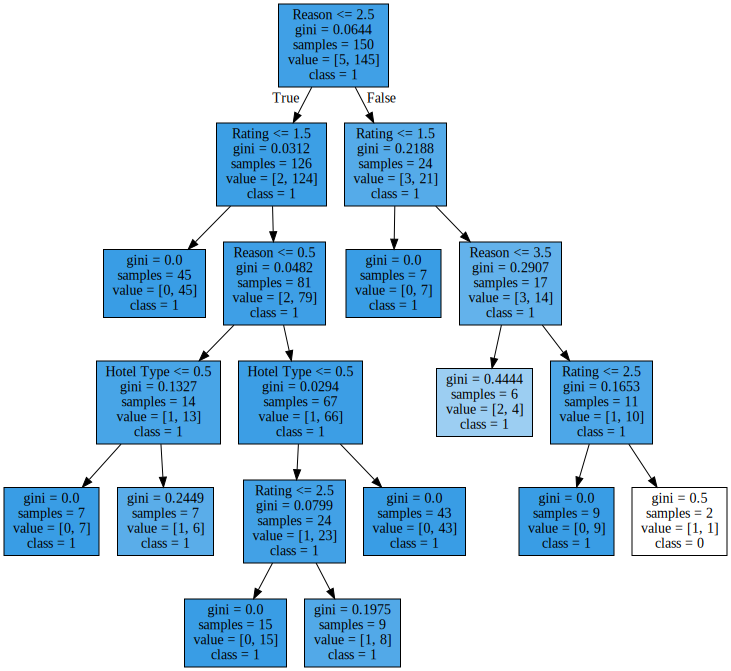

In [ ]:
dot_data = tree.export_graphviz(tree1,feature_names = X_train.columns,class_names=["0","1"], filled=True, precision=4)
graph = graphviz.Source(dot_data, format="png") 
graph

In [ ]:
sat_train_score_1 = accuracy_score(y_train, y_pred_t1)*100

In [ ]:
sat_test_score_1 = accuracy_score(y_test, y_pred1)*100
sat_test_score_1

84.31372549019608

In [ ]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.91      0.91      0.91        47

    accuracy                           0.84        51
   macro avg       0.46      0.46      0.46        51
weighted avg       0.84      0.84      0.84        51



In [ ]:
cm1 = confusion_matrix(y_test, y_pred1)
cm1


array([[ 0,  4],
       [ 4, 43]])

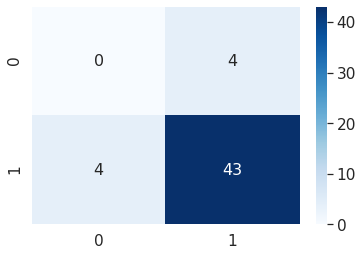

In [ ]:
df_cm1 = pd.DataFrame(cm1, range(2), range(2))
sns.set(font_scale=1.4) 
sns.heatmap(df_cm1, annot=True, cmap='Blues', annot_kws={"size": 16}, fmt='g') # font size
plt.show()